In [1]:
%load_ext autoreload

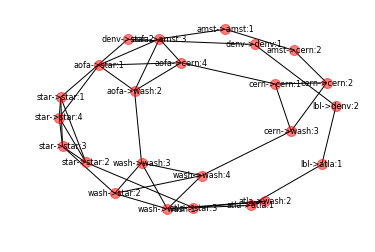

with servers


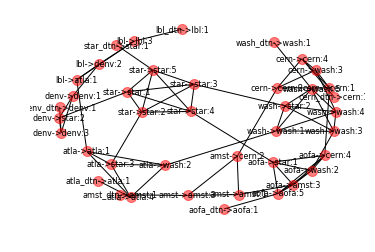

In [22]:
%aimport sim
%autoreload 2
from sim import Topology, Endpoint

topo = None
endpoints = []

def create_topology():
    global topo, endpoints
    topo = Topology("ESnet SDN Testbed Topology", ticks_per_sec=100)

    topo.add_routers(['lbl','denv','atla','wash','aofa','amst','cern','star'])
    topo.add_link(router_a='lbl',router_b='atla',capacity=10000,latency=80)
    topo.add_link(router_a='lbl',router_b='denv',capacity=10000,latency=50)
    topo.add_link(router_a='denv',router_b='star',capacity=10000,latency=60)
    topo.add_link(router_a='atla',router_b='wash',capacity=10000,latency=35)
    topo.add_link(router_a='atla',router_b='star',capacity=10000,latency=40)
    topo.add_link(router_a='wash',router_b='star',capacity=10000,latency=15)
    topo.add_link(router_a='aofa',router_b='star',capacity=10000,latency=50)
    topo.add_link(router_a='aofa',router_b='wash',capacity=10000,latency=40)
    topo.add_link(router_a='aofa',router_b='amst',capacity=20000,latency=120)
    topo.add_link(router_a='aofa',router_b='cern',capacity=10000,latency=120)
    topo.add_link(router_a='amst',router_b='cern',capacity=20000,latency=20)
    topo.add_link(router_a='cern',router_b='wash',capacity=10000,latency=20)

    topo.draw()

    lbl_dtn = Endpoint(name='lbl_dtn',topology=topo,capacity=10000,rate=10000)
    lbl_dtn.connect('lbl', latency=0)
    denv_dtn = Endpoint(name='denv_dtn',topology=topo,capacity=10000,rate=10000)
    denv_dtn.connect('denv', latency=0)
    atla_dtn = Endpoint(name='atla_dtn',topology=topo,capacity=10000,rate=10000)
    atla_dtn.connect('atla', latency=0)
    wash_dtn = Endpoint(name='wash_dtn',topology=topo,capacity=10000,rate=10000)
    wash_dtn.connect('wash', latency=0)
    star_dtn = Endpoint(name='star_dtn',topology=topo,capacity=10000,rate=10000)
    star_dtn.connect('star', latency=0)
    aofa_dtn = Endpoint(name='aofa_dtn',topology=topo,capacity=10000,rate=10000)
    aofa_dtn.connect('aofa', latency=0)
    amst_dtn = Endpoint(name='amst_dtn',topology=topo,capacity=10000,rate=10000)
    amst_dtn.connect('amst', latency=0)
    cern_dtn = Endpoint(name='cern_dtn',topology=topo,capacity=10000,rate=10000)
    cern_dtn.connect('cern', latency=0)

    endpoints=[lbl_dtn,denv_dtn,star_dtn,aofa_dtn,wash_dtn,amst_dtn,cern_dtn,atla_dtn]

    print "with servers"
    topo.draw()
    
def get_endpoint(name):
    global endpoints
    for endpoint in endpoints:
        if endpoint.name == name:
            return endpoint
    return None


create_topology()


In [23]:
from sim import DataTransfer
import numpy as np

flows = {}

def reset_flows():
    global flows
    for flow in flows.values():
            flow.reset()

def create_workflows(topo,endpoints,nb_of_flows,data_size,max_rate,nb_of_streams=1):
    global flows
    for endpoint in endpoints:
        for i in range(nb_of_flows):
            # select a random destination
            dst = None
            while True:
                dst = endpoints[np.random.randint(len(endpoints))]
                if dst != endpoint:
                    break    
            for s in range(nb_of_streams):
                flow = DataTransfer(name= endpoint.name+'-'+dst.name+"-"+str(data_size)+':'+str(i)+':'+str(s),
                                    src=endpoint,
                                    dst=dst,
                                    data_size=data_size/nb_of_streams,
                                    max_rate=max_rate/nb_of_streams,
                                    topology=topo)
                flow.endpoint = endpoint
                flow.info = True
                flow.debug = False
                flow.record_receive = True
                flow.record_drop = True
                flows[flow.name] = flow   
                topo.schedule_workflow(workflow=flow)

def delete_flows():
    global flows
    flows = {}
    
def show_receive(endpoint=None, single=False):
    global flows
    for flow in flows.values():
        if endpoint == None or flow.endpoint == endpoint:
            flow.plot_receive()
            if single: topo.show_plots()
    if not single:
        topo.show_plots()

def show_all(single=None):
    for endpoint in endpoints:
        print endpoint.name
        show_receive(endpoint=endpoint, single=single)

def get_av_rate_rtt():
    x=[]
    y=[]
    for flow in flows.values():
        y.append(flow.average)
        x.append(flow.rtt)
    return x,y

In [28]:
delete_flows()
create_workflows(topo, endpoints, nb_of_flows=1,data_size=800000,max_rate=9000,nb_of_streams=4)
create_workflows(topo, endpoints, nb_of_flows=20,data_size=10000,max_rate=100)
#create_workflows(topo, endpoints, nb_of_flows=1,data_size=800000,max_rate=10000)

In [25]:
def run_simulation():
    reset_flows()
    print "simlation starts with",len(flows),"flows"
    topo.start_simulation()
    

In [29]:
from threading import Thread

sim_thread = Thread(target=run_simulation)
sim_thread.start()

simlation starts with 192 flows
Simulation starts 451440
451440 start file transfer lbl_dtn-aofa_dtn-800000:0:0
451440 start file transfer lbl_dtn-aofa_dtn-800000:0:1
451440 start file transfer lbl_dtn-aofa_dtn-800000:0:2
451440 start file transfer lbl_dtn-aofa_dtn-800000:0:3
451440 start file transfer denv_dtn-atla_dtn-800000:0:0
451440 start file transfer denv_dtn-atla_dtn-800000:0:1
451440 start file transfer denv_dtn-atla_dtn-800000:0:2
451440 start file transfer denv_dtn-atla_dtn-800000:0:3
451440 start file transfer star_dtn-wash_dtn-800000:0:0
451440 start file transfer star_dtn-wash_dtn-800000:0:1
451440 start file transfer star_dtn-wash_dtn-800000:0:2
451440 start file transfer star_dtn-wash_dtn-800000:0:3
451440 start file transfer aofa_dtn-wash_dtn-800000:0:0
451440 start file transfer aofa_dtn-wash_dtn-800000:0:1
451440 start file transfer aofa_dtn-wash_dtn-800000:0:2
451440 start file transfer aofa_dtn-wash_dtn-800000:0:3
451440 start file transfer wash_dtn-aofa_dtn-800000

lbl_dtn


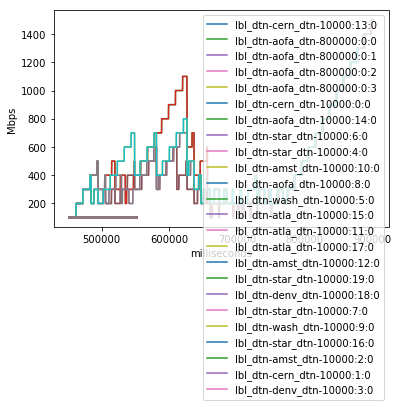

denv_dtn


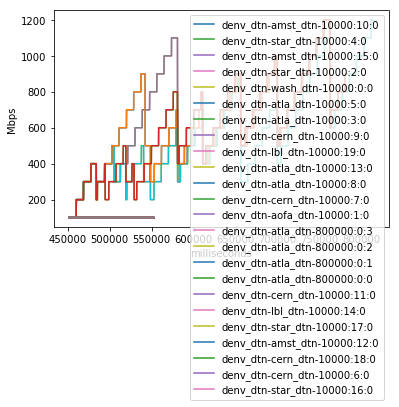

star_dtn


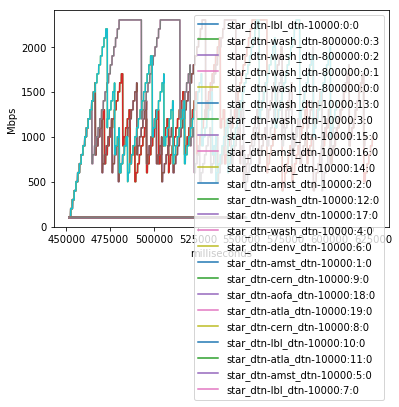

aofa_dtn


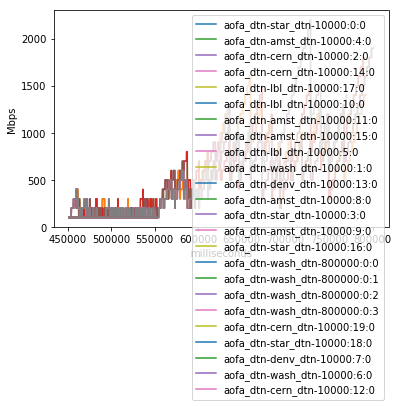

wash_dtn


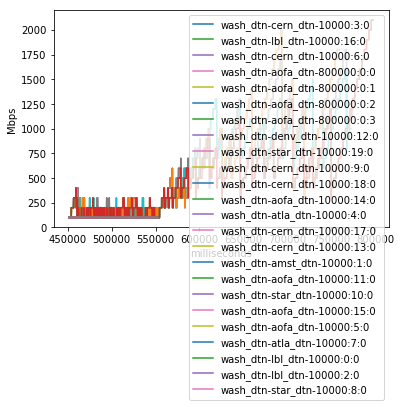

amst_dtn


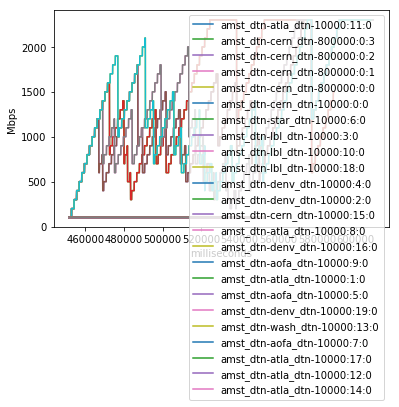

cern_dtn


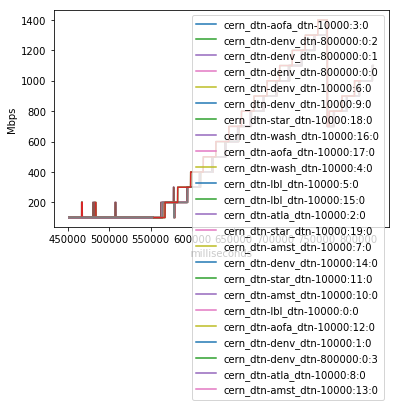

atla_dtn


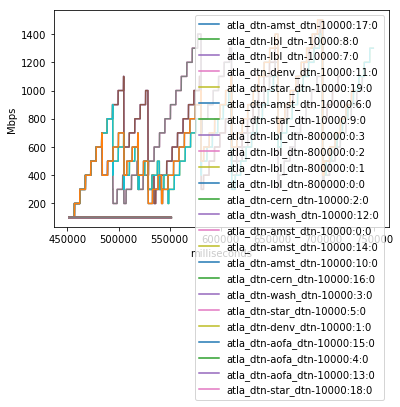

In [32]:
show_all(single=False)

192 192


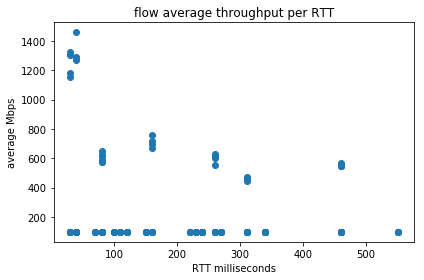

In [33]:
import matplotlib.pyplot as plt


x,y = get_av_rate_rtt()
print len(x),len(y)
fig, ax = plt.subplots()

ax.plot(x,y, 'o')
ax.set_xlabel('RTT milliseconds')
ax.set_ylabel('average Mbps')
ax.set_title(r'flow average throughput per RTT')

fig.tight_layout()

plt.show()


In [37]:
def do_this():
    print topo.sim_rate()

t = Thread(target=do_this)
t.start()

(449810, 839.0198562145233, 0.5361136529348015)
